## Termination Criterion

Whenever an algorithm is executed, it needs to be decided in each iteration whether the optimization run shall be continued or not.
Many different ways exist of how to determine when a run of an algorithm should be terminated. Next, termination criteria specifically developed for single or multi-objective optimization as well as more generalized, for instance, limiting the number of iterations of an algorithm, are described 

### Default Termination ('default')

We have added recently developed a termination criterion set if no termination is supplied to the `minimize()` method:

In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize

problem = get_problem("zdt1")
algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               seed=1)

print(res.algorithm.n_gen)

150


This allows you to terminated based on a couple of criteria also explained later on this page. 
Commonly used are the movement in the design space `f_tol` and the convergence in the constraint `cv_tol` and objective space `f_tol`.
To provide an upper bound for the algorithm, we recommend supplying a maximum number of generations `n_max_gen` or function evaluations `n_max_evals`.

Moreover, it is worth mentioning that tolerance termination is based on a sliding window. Not only the last, but a sequence of the `n_last` generations are used to calculate compare the tolerances with an bound defined by the user.

By default for multi-objective problems, the termination will be set to

In [2]:
from pymoo.util.termination.default import MultiObjectiveDefaultTermination

termination = MultiObjectiveDefaultTermination(
    x_tol=1e-8, 
    cv_tol=1e-6, 
    f_tol=0.0025, 
    nth_gen=5, 
    n_last=30,
    n_max_gen=1000,
    n_max_evals=100000
)

And for single-optimization to

In [3]:
from pymoo.util.termination.default import SingleObjectiveDefaultTermination

termination = SingleObjectiveDefaultTermination(
    x_tol=1e-8, 
    cv_tol=1e-6, 
    f_tol=1e-6, 
    nth_gen=5, 
    n_last=20,
    n_max_gen=1000,
    n_max_evals=100000
)

### Number of Evaluations ('n_eval')

The termination can simply be reached by providing an upper bound for the number of function evaluations. Whenever in an iteration, the number of function evaluations is greater than this upper bound the algorithm terminates.

In [4]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem, get_termination
from pymoo.optimize import minimize

problem = get_problem("zdt3")
algorithm = NSGA2(pop_size=100)
termination = get_termination("n_eval", 300)

res = minimize(problem,
               algorithm,
               termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=True)

n_gen |  n_eval |     igd      |      gd      |      hv     
    1 |     100 |  1.304648356 |  1.530191068 |  0.00000E+00
    2 |     200 |  1.304200356 |  1.517648901 |  0.00000E+00
    3 |     300 |  0.988539101 |  1.378914374 |  0.00000E+00


### Number of Generations ('n_gen')

Moreover, the number of generations / iterations can be limited as well. 

In [5]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem, get_termination
from pymoo.optimize import minimize

problem = get_problem("zdt3")
algorithm = NSGA2(pop_size=100)
termination = get_termination("n_gen", 10)

res = minimize(problem,
               algorithm,
               termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=True)

n_gen |  n_eval |     igd      |      gd      |      hv     
    1 |     100 |  1.304648356 |  1.530191068 |  0.00000E+00
    2 |     200 |  1.304200356 |  1.517648901 |  0.00000E+00
    3 |     300 |  0.988539101 |  1.378914374 |  0.00000E+00
    4 |     400 |  0.920567183 |  1.351594290 |  0.00000E+00
    5 |     500 |  0.920567183 |  1.282794381 |  0.00000E+00
    6 |     600 |  0.894035691 |  1.360904372 |  0.00000E+00
    7 |     700 |  0.817395517 |  1.280727114 |  0.00000E+00
    8 |     800 |  0.802167697 |  1.189542707 |  0.00000E+00
    9 |     900 |  0.730335663 |  0.993344639 |  0.002211246
   10 |    1000 |  0.699750404 |  0.851632873 |  0.002211246


### Based on Time ('time')

The termination can also be based on the time of the algorithm to be executed. For instance, to run an algorithm for 3 seconds the termination can be defined by `get_termination("time", "00:00:03")` or for 1 hour and 30 minutes by `get_termination("time", "01:30:00")`.

In [6]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem, get_termination
from pymoo.optimize import minimize

problem = get_problem("zdt3")
algorithm = NSGA2(pop_size=100)
termination = get_termination("time", "00:00:03")

res = minimize(problem,
               algorithm,
               termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=False)

print(res.algorithm.n_gen)


385


### Design Space Tolerance ('x_tol')


Also, we can track the change in the design space. For a parameter explanation, please have a look at 'ftol'.

In [7]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.util.termination.x_tol import DesignSpaceToleranceTermination

problem = get_problem("zdt3")
algorithm = NSGA2(pop_size=100)
termination = DesignSpaceToleranceTermination(tol=0.0025, n_last=20)

res = minimize(problem,
               algorithm,
               termination,
               pf=problem.pareto_front(),
               seed=1,
               verbose=False)

print(res.algorithm.n_gen)


167


### Objective Space Tolerance ('f_tol')

The most interesting stopping criterion is to use objective space change to decide whether to terminate the algorithm. Here, we mostly use a simple and efficient procedure to determine whether to stop or not. We aim to improve it further in the future. If somebody is interested in collaborating, please let us know.

The parameters of our implementation are:

**tol**: What is the tolerance in the objective space on average. If the value is below this bound, we terminate.

**n_last**: To make the criterion more robust, we consider the last $n$ generations and take the maximum. This considers the worst case in a window.

**n_max_gen**: As a fallback, the generation number can be used. For some problems, the termination criterion might not be reached; however, an upper bound for generations can be defined to stop in that case.

**nth_gen**: Defines whenever the termination criterion is calculated by default, every 10th generation.

Generations 165


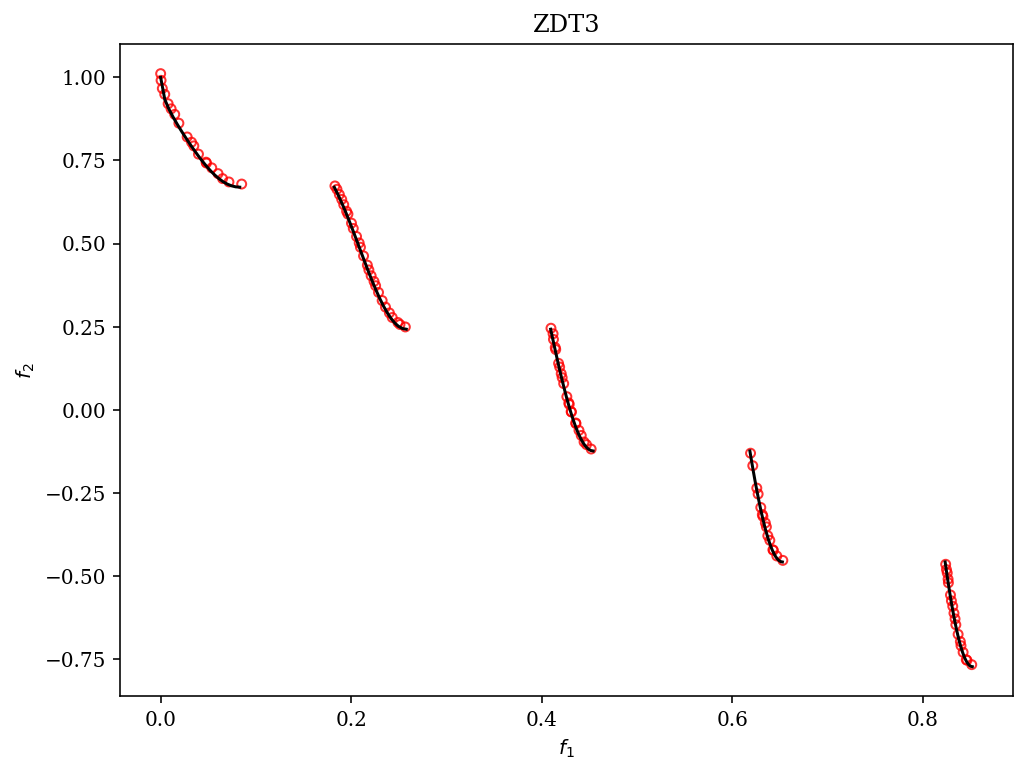

In [8]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.util.termination.f_tol import MultiObjectiveSpaceToleranceTermination
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt3")
algorithm = NSGA2(pop_size=100)
termination = MultiObjectiveSpaceToleranceTermination(tol=0.0025,
                                                      n_last=30,
                                                      nth_gen=5,
                                                      n_max_gen=None,
                                                      n_max_evals=None)

res = minimize(problem,
               algorithm,
               termination,
               pf=True,
               seed=1,
               verbose=False)

print("Generations", res.algorithm.n_gen)
plot = Scatter(title="ZDT3")
plot.add(problem.pareto_front(use_cache=False, flatten=False), plot_type="line", color="black")
plot.add(res.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.show()
